In [1]:
import os
import geopandas as gpd
import folium
import pandas as pd
import branca.colormap as cm  # For the color scale

# Load dataset
file_path = "updated_jabodetabeksur_olx_housing_dataset_.csv"
df = pd.read_csv(file_path)

# Count listings for each subdistrict
district_counts = df['address_district'].str.lower().value_counts().reset_index()
district_counts.columns = ['address_district', 'listing_count']

# Define the color scale based on listing counts
min_count = district_counts['listing_count'].min()
max_count = district_counts['listing_count'].max()

colormap = cm.linear.YlOrRd_09.scale(min_count, max_count)  # Use a proper colormap  # Yellow → Orange → Red Gradient

# Initialize Folium Map centered around Jakarta
m = folium.Map(location=[-6.2, 106.8], zoom_start=10)

# Define base path for GeoJSON files
geojson_base_path = r"E:\Programming\Python\Proyek Scraping\olx\rumah\notebook\indonesia-district-master\indonesia-district-master"

# Function to construct GeoJSON file path
def get_geojson_path(district_name):
    """
    Convert district name to corresponding GeoJSON file path using Dukcapil ID.
    """
    dukcapil_id_map = {
            'kepulauan seribu selatan': "id31_dki_jakarta\id3101_kepulauan_seribu\id3101010_kepulauan_seribu_selatan.geojson",
            'kepulauan seribu utara': "id31_dki_jakarta\id3101_kepulauan_seribu\id3101020_kepulauan_seribu_utara.geojson",
            'jagakarsa': "id31_dki_jakarta\id3171_kota_jakarta_selatan\id3171010_jagakarsa.geojson",
            'pasar minggu': "id31_dki_jakarta\id3171_kota_jakarta_selatan\id3171020_pasar_minggu.geojson",
            'cilandak': "id31_dki_jakarta\id3171_kota_jakarta_selatan\id3171030_cilandak.geojson",
            'pesanggrahan': "id31_dki_jakarta\id3171_kota_jakarta_selatan\id3171040_pesanggrahan.geojson",
            'kebayoran lama': "id31_dki_jakarta\id3171_kota_jakarta_selatan\id3171050_kebayoran_lama.geojson",
            'kebayoran baru': "id31_dki_jakarta\id3171_kota_jakarta_selatan\id3171060_kebayoran_baru.geojson",
            'mampang prapatan': "id31_dki_jakarta\id3171_kota_jakarta_selatan\id3171070_mampang_prapatan.geojson",
            'pancoran': "id31_dki_jakarta\id3171_kota_jakarta_selatan\id3171080_pancoran.geojson",
            'tebet': "id31_dki_jakarta\id3171_kota_jakarta_selatan\id3171090_tebet.geojson",
            'setia budi': "id31_dki_jakarta\id3171_kota_jakarta_selatan\id3171100_setia_budi.geojson",
            'pasar rebo': "id31_dki_jakarta\id3172_kota_jakarta_timur\id3172010_pasar_rebo.geojson",
            'ciracas': "id31_dki_jakarta\id3172_kota_jakarta_timur\id3172020_ciracas.geojson",
            'cipayung': "id31_dki_jakarta\id3172_kota_jakarta_timur\id3172030_cipayung.geojson",
            'makasar': "id31_dki_jakarta\id3172_kota_jakarta_timur\id3172040_makasar.geojson",
            'kramat jati': "id31_dki_jakarta\id3172_kota_jakarta_timur\id3172050_kramat_jati.geojson",
            'jatinegara': "id31_dki_jakarta\id3172_kota_jakarta_timur\id3172060_jatinegara.geojson",
            'duren sawit': "id31_dki_jakarta\id3172_kota_jakarta_timur\id3172070_duren_sawit.geojson",
            'cakung': "id31_dki_jakarta\id3172_kota_jakarta_timur\id3172080_cakung.geojson",
            'pulo gadung': "id31_dki_jakarta\id3172_kota_jakarta_timur\id3172090_pulo_gadung.geojson",
            'matraman': "id31_dki_jakarta\id3172_kota_jakarta_timur\id3172100_matraman.geojson",
            'tanah abang': "id31_dki_jakarta\id3173_kota_jakarta_pusat\id3173010_tanah_abang.geojson",
            'menteng': "id31_dki_jakarta\id3173_kota_jakarta_pusat\id3173020_menteng.geojson",
            'senen': "id31_dki_jakarta\id3173_kota_jakarta_pusat\id3173030_senen.geojson",
            'johar baru': "id31_dki_jakarta\id3173_kota_jakarta_pusat\id3173040_johar_baru.geojson",
            'cempaka putih': "id31_dki_jakarta\id3173_kota_jakarta_pusat\id3173050_cempaka_putih.geojson",
            'kemayoran': "id31_dki_jakarta\id3173_kota_jakarta_pusat\id3173060_kemayoran.geojson",
            'sawah besar': "id31_dki_jakarta\id3173_kota_jakarta_pusat\id3173070_sawah_besar.geojson",
            'gambir': "id31_dki_jakarta\id3173_kota_jakarta_pusat\id3173080_gambir.geojson",
            'kembangan': "id31_dki_jakarta\id3174_kota_jakarta_barat\id3174010_kembangan.geojson",
            'kebon jeruk': "id31_dki_jakarta\id3174_kota_jakarta_barat\id3174020_kebon_jeruk.geojson",
            'palmerah': "id31_dki_jakarta\id3174_kota_jakarta_barat\id3174030_palmerah.geojson",
            'grogol petamburan': "id31_dki_jakarta\id3174_kota_jakarta_barat\id3174040_grogol_petamburan.geojson",
            'tambora': "id31_dki_jakarta\id3174_kota_jakarta_barat\id3174050_tambora.geojson",
            'taman sari': "id31_dki_jakarta\id3174_kota_jakarta_barat\id3174060_taman_sari.geojson",
            'cengkareng': "id31_dki_jakarta\id3174_kota_jakarta_barat\id3174070_cengkareng.geojson",
            'kalideres': "id31_dki_jakarta\id3174_kota_jakarta_barat\id3174080_kali_deres.geojson",
            'penjaringan': "id31_dki_jakarta\id3175_kota_jakarta_utara\id3175010_penjaringan.geojson",
            'pademangan': "id31_dki_jakarta\id3175_kota_jakarta_utara\id3175020_pademangan.geojson",
            'tanjung priok': "id31_dki_jakarta\id3175_kota_jakarta_utara\id3175030_tanjung_priok.geojson",
            'koja': "id31_dki_jakarta\id3175_kota_jakarta_utara\id3175040_koja.geojson",
            'kelapa gading': "id31_dki_jakarta\id3175_kota_jakarta_utara\id3175050_kelapa_gading.geojson",
            'cilincing': "id31_dki_jakarta\id3175_kota_jakarta_utara\id3175060_cilincing.geojson",
            'danau sunter dll': "id31_dki_jakarta\id3175_kota_jakarta_utara\id3175555_danau_sunter_dll.geojson",
            'danau sunter': "id31_dki_jakarta\id3175_kota_jakarta_utara\id3175888_danau_sunter.geojson",
            'setu': "id36_banten\id3674_kota_tangerang_selatan\id3674010_setu.geojson",
            'serpong': "id36_banten\id3674_kota_tangerang_selatan\id3674020_serpong.geojson",
            'pamulang': "id36_banten\id3674_kota_tangerang_selatan\id3674030_pamulang.geojson",
            'ciputat': "id36_banten\id3674_kota_tangerang_selatan\id3674040_ciputat.geojson",
            'ciputat timur': "id36_banten\id3674_kota_tangerang_selatan\id3674050_ciputat_timur.geojson",
            'serpong utara': "id36_banten\id3674_kota_tangerang_selatan\id3674070_serpong_utara.geojson",
            'pondok aren': "id36_banten\id3674_kota_tangerang_selatan\id3674060_pondok_aren.geojson",
            'ciledug': "id36_banten\id3671_kota_tangerang\id3671010_ciledug.geojson",
            'larangan': "id36_banten\id3671_kota_tangerang\id3671011_larangan.geojson",
            'karang tengah': "id36_banten\id3671_kota_tangerang\id3671012_karang_tengah.geojson",
            'cipondoh': "id36_banten\id3671_kota_tangerang\id3671020_cipondoh.geojson",
            'pinang (penang)': "id36_banten\id3671_kota_tangerang\id3671021_pinang.geojson",
            'tangerang': "id36_banten\id3671_kota_tangerang\id3671030_tangerang.geojson",
            'karawaci': "id36_banten\id3671_kota_tangerang\id3671031_karawaci.geojson",
            'jati uwung': "id36_banten\id3671_kota_tangerang\id3671040_jati_uwung.geojson",
            'cibodas': "id36_banten\id3671_kota_tangerang\id3671041_cibodas.geojson",
            'periuk': "id36_banten\id3671_kota_tangerang\id3671042_periuk.geojson",
            'batuceper': "id36_banten\id3671_kota_tangerang\id3671050_batuceper.geojson",
            'neglasari': "id36_banten\id3671_kota_tangerang\id3671051_neglasari.geojson",
            'benda': "id36_banten\id3671_kota_tangerang\id3671060_benda.geojson",
            'pondok gede': "id32_jawa_barat\id3275_kota_bekasi\id3275010_pondokgede.geojson",
            'jati sampurna': "id32_jawa_barat\id3275_kota_bekasi\id3275011_jatisampurna.geojson",
            'pondok melati': "id32_jawa_barat\id3275_kota_bekasi\id3275012_pondokmelati.geojson",
            'jatiasih': "id32_jawa_barat\id3275_kota_bekasi\id3275020_jatiasih.geojson",
            'bantar gebang': "id32_jawa_barat\id3275_kota_bekasi\id3275030_bantargebang.geojson",
            'mustika jaya': "id32_jawa_barat\id3275_kota_bekasi\id3275031_mustikajaya.geojson",
            'bekasi timur': "id32_jawa_barat\id3275_kota_bekasi\id3275040_bekasi_timur.geojson",
            'rawalumbu': "id32_jawa_barat\id3275_kota_bekasi\id3275041_rawalumbu.geojson",
            'bekasi selatan': "id32_jawa_barat\id3275_kota_bekasi\id3275050_bekasi_selatan.geojson",
            'bekasi barat': "id32_jawa_barat\id3275_kota_bekasi\id3275060_bekasi_barat.geojson",
            'medan satria': "id32_jawa_barat\id3275_kota_bekasi\id3275061_medan_satria.geojson",
            'bekasi utara': "id32_jawa_barat\id3275_kota_bekasi\id3275070_bekasi_utara.geojson",
            'bogor selatan - kota': "id32_jawa_barat\id3271_kota_bogor\id3271010_bogor_selatan.geojson",
            'bogor timur - kota': "id32_jawa_barat\id3271_kota_bogor\id3271020_bogor_timur.geojson",
            'bogor utara - kota': "id32_jawa_barat\id3271_kota_bogor\id3271030_bogor_utara.geojson",
            'bogor tengah - kota': "id32_jawa_barat\id3271_kota_bogor\id3271040_bogor_tengah.geojson",
            'bogor barat - kota': "id32_jawa_barat\id3271_kota_bogor\id3271050_bogor_barat.geojson",
            'tanah sereal': "id32_jawa_barat\id3271_kota_bogor\id3271060_tanah_sereal.geojson",
            'tanah sareal': "id32_jawa_barat\id3271_kota_bogor\id3271060_tanah_sereal.geojson",
            'sawangan': "id32_jawa_barat\id3276_kota_depok\id3276010_sawangan.geojson",
            'bojongsari': "id32_jawa_barat\id3276_kota_depok\id3276011_bojongsari.geojson",
            'pancoran mas': "id32_jawa_barat\id3276_kota_depok\id3276020_pancoran_mas.geojson",
            'cipayung': "id32_jawa_barat\id3276_kota_depok\id3276021_cipayung.geojson",
            'sukmajaya': "id32_jawa_barat\id3276_kota_depok\id3276030_sukma_jaya.geojson",
            'cilodong': "id32_jawa_barat\id3276_kota_depok\id3276031_cilodong.geojson",
            'cimanggis': "id32_jawa_barat\id3276_kota_depok\id3276040_cimanggis.geojson",
            'tapos': "id32_jawa_barat\id3276_kota_depok\id3276041_tapos.geojson",
            'beji': "id32_jawa_barat\id3276_kota_depok\id3276050_beji.geojson",
            'limo': "id32_jawa_barat\id3276_kota_depok\id3276060_limo.geojson",
            'cinere': "id32_jawa_barat\id3276_kota_depok\id3276061_cinere.geojson",
            'kemang': "id32_jawa_barat\id3201_bogor\id3201230_kemang.geojson",
            'cileungsi':"id32_jawa_barat\id3201_bogor\id3201180_cileungsi.geojson",
            'tambun selatan': "id32_jawa_barat\id3216_bekasi\id3216081_tambun_selatan.geojson",
            'kosambi': "id36_banten\id3603_tangerang\id3603210_kosambi.geojson",
            'teluknaga': "id36_banten\id3603_tangerang\id3603200_teluknaga.geojson",
            'cisauk': "id36_banten\id3603_tangerang\id3603081_cisauk.geojson",
            'tajurhalang': "id32_jawa_barat\id3201_bogor\id3201221_tajur_halang.geojson",
            'ciomas': "id32_jawa_barat\id3201_bogor\id3201070_ciomas.geojson",
            'parung': "id32_jawa_barat\id3201_bogor\id3201240_parung.geojson",
            'kelapa dua': "id36_banten\id3603_tangerang\id3603051_kelapa_dua.geojson",
            'cibinong': "id32_jawa_barat\id3201_bogor\id3201210_cibinong.geojson",
            'dramaga': "id32_jawa_barat\id3201_bogor\id3201060_dramaga.geojson",
            'babakan madang': "id32_jawa_barat\id3201_bogor\id3201140_babakan_madang.geojson",
            'sukadiri': "id36_banten\id3603_tangerang\id3603162_sukadiri.geojson",
            'ranca bungur': "id32_jawa_barat\id3201_bogor\id3201231_ranca_bungur.geojson",
            'pakuhaji': "id36_banten\id3603_tangerang\id3603190_pakuhaji.geojson",
            'bojonggede': "id32_jawa_barat\id3201_bogor\id3201220_bojong_gede.geojson",
            'sukaraja': "id32_jawa_barat\id3201_bogor\id3201130_sukaraja.geojson",
            'sukomanunggal': "id35_jawa_timur\id3578_kota_surabaya\id3578160_suko_manunggal.geojson",
            'lakarsantri': "id35_jawa_timur\id3578_kota_surabaya\id3578140_lakarsantri.geojson",
            'tegalsari': "id35_jawa_timur\id3578_kota_surabaya\id3578180_tegalsari.geojson",
            'wonokromo': "id35_jawa_timur\id3578_kota_surabaya\id3578110_wonokromo.geojson",
            'gayungan': "id35_jawa_timur\id3578_kota_surabaya\id3578030_gayungan.geojson",
            'kenjeran': "id35_jawa_timur\id3578_kota_surabaya\id3578210_kenjeran.geojson",
            'wonocolo': "id35_jawa_timur\id3578_kota_surabaya\id3578040_wonocolo.geojson",
            'sawahan': "id35_jawa_timur\id3578_kota_surabaya\id3578170_sawahan.geojson",
            'genteng': "id35_jawa_timur\id3578_kota_surabaya\id3578190_genteng.geojson",
            'tandes': "id35_jawa_timur\id3578_kota_surabaya\id3578150_tandes.geojson",
            'tambaksari': "id35_jawa_timur\id3578_kota_surabaya\id3578200_tambaksari.geojson",
            'jambangan': "id35_jawa_timur\id3578_kota_surabaya\id3578020_jambangan.geojson",
            'dukuh pakis': "id35_jawa_timur\id3578_kota_surabaya\id3578120_dukuh_pakis.geojson",
            'sukolilo': "id35_jawa_timur\id3578_kota_surabaya\id3578080_sukolilo.geojson",
            'wiyung': "id35_jawa_timur\id3578_kota_surabaya\id3578130_wiyung.geojson",
            'waru': "id35_jawa_timur\id3515_sidoarjo\id3515140_waru.geojson",
            'tenggilis mejoyo': "id35_jawa_timur\id3578_kota_surabaya\id3578050_tenggilis_mejoyo.geojson",
            'gununganyar': "id35_jawa_timur\id3578_kota_surabaya\id3578060_gunung_anyar.geojson",
            'rungkut': "id35_jawa_timur\id3578_kota_surabaya\id3578070_rungkut.geojson",
            'gubeng': "id35_jawa_timur\id3578_kota_surabaya\id3578100_gubeng.geojson",
            'mulyorejo': "id35_jawa_timur\id3578_kota_surabaya\id3578090_mulyorejo.geojson",
            'sambikerep': "id35_jawa_timur\id3578_kota_surabaya\id3578141_sambikerep.geojson",
            'gunung sindur': "id32_jawa_barat\id3201_bogor\id3201250_gunung_sindur.geojson"
            
     
    }
    
    if district_name not in dukcapil_id_map:
        return None  # Return None if the subdistrict is not found

    return os.path.join(geojson_base_path, dukcapil_id_map[district_name])

# Loop through each kecamatan

skipped_districts = []
total_skipped_listings = 0

# Loop through each kecamatan
label_layer = folium.FeatureGroup(name="district Labels", show=False).add_to(m)

for _, row in district_counts.iterrows():
    district = row["address_district"]
    listing_count = row["listing_count"]

    geojson_path = get_geojson_path(district)

    # Skip if district is not mapped
    if geojson_path is None:
        print(f"Skipping {district}: No mapping found.")
        skipped_districts.append(district)
        total_skipped_listings += listing_count
        continue

    # Skip if GeoJSON file doesn't exist
    if not os.path.exists(geojson_path):
        print(f"Skipping {district}: GeoJSON file not found at {geojson_path}")
        skipped_districts.append(district)
        total_skipped_listings += listing_count
        continue

    gdf = gpd.read_file(geojson_path)
    gdf = gdf.to_crs(epsg=4326)

    # Convert Timestamp columns to strings (avoid serialization errors)
    for col in gdf.columns:
        if pd.api.types.is_datetime64_any_dtype(gdf[col]):
            gdf[col] = gdf[col].astype(str)

    gdf["listing_count"] = listing_count

    folium.GeoJson(
        gdf,
        name=f"{district} Border",
        style_function=lambda feature: {
            "fillColor": colormap(feature["properties"]["listing_count"])
            if "listing_count" in feature["properties"]
            else "#FFFFFF",
            "color": "black",
            "weight": 1,
            "fillOpacity": 0.6,
        },
    ).add_to(m)

    centroid = gdf.geometry.centroid.iloc[0]

    folium.Marker(
        location=[centroid.y, centroid.x],
        icon=folium.DivIcon(
            html=f"""
            <div style="
                display: inline-block;
                font-size: 14px; 
                font-weight: bold; 
                color: black; 
                background: rgba(255, 255, 255, 0.8); 
                padding: 5px 10px;  
                border-radius: 5px;
                border: 1px solid black;
                white-space: nowrap;  
                text-align: center;
            ">
                {district.title()}<br>
                Listings: {listing_count}
            </div>
            """,
        ),
    ).add_to(label_layer)

    print(f"Added {district.title()} with {listing_count} listings.")

colormap.caption = "Number of Listings per district"
colormap.add_to(m)
folium.LayerControl().add_to(m)
m.save("listing_map.html")
print("Map saved as listing_map.html")

# Print skipped summary
if skipped_districts:
    print(f"\nSkipped {len(skipped_districts)} district(s):")
    for s in skipped_districts:
        print(f" - {s}")
    print(f"\nTotal listings skipped: {total_skipped_listings}")
else:
    print("\nNo districts were skipped.")

C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Pondok Aren with 401 listings.
Added Sawangan with 344 listings.
Added Bekasi Utara with 333 listings.
Added Serpong with 330 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Kemang with 299 listings.
Added Rungkut with 292 listings.
Added Gubeng with 292 listings.
Added Jatiasih with 272 listings.
Added Mulyorejo with 264 listings.
Skipping gading serpong: No mapping found.
Added Pamulang with 238 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Cileungsi with 235 listings.
Added Mustika Jaya with 219 listings.
Added Pancoran Mas with 219 listings.
Skipping citraland: No mapping found.
Skipping pantai indah kapuk: No mapping found.
Added Jagakarsa with 209 listings.
Added Cipayung with 204 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Cimanggis with 203 listings.
Added Tangerang with 202 listings.
Skipping bumi serpong damai: No mapping found.
Added Kelapa Gading with 200 listings.
Added Tambun Selatan with 199 listings.
Added Karawaci with 199 listings.
Added Ciputat with 198 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Cilodong with 197 listings.
Added Bekasi Selatan with 192 listings.
Added Cengkareng with 190 listings.
Added Tapos with 189 listings.
Added Pondok Gede with 178 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Serpong Utara with 177 listings.
Added Kebayoran Lama with 177 listings.
Added Tanah Sareal with 175 listings.
Skipping cibubur: No mapping found.
Added Cakung with 168 listings.
Added Tanjung Priok with 168 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Bogor Selatan - Kota with 166 listings.
Added Duren Sawit with 166 listings.
Added Kembangan with 165 listings.
Added Kosambi with 165 listings.
Added Bogor Barat - Kota with 164 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Cipondoh with 161 listings.
Added Medan Satria with 155 listings.
Added Teluknaga with 150 listings.
Added Pasar Minggu with 147 listings.
Added Grogol Petamburan with 145 listings.
Skipping pakuwon: No mapping found.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Pesanggrahan with 141 listings.
Added Cilandak with 141 listings.
Added Jati Sampurna with 140 listings.
Added Kebayoran Baru with 139 listings.
Added Kalideres with 125 listings.
Added Bekasi Barat with 124 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Cempaka Putih with 123 listings.
Added Dukuh Pakis with 123 listings.
Added Sukolilo with 122 listings.
Added Sukaraja with 120 listings.
Added Ciracas with 116 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Bogor Timur - Kota with 116 listings.
Added Pancoran with 113 listings.
Added Kebon Jeruk with 112 listings.
Added Jatinegara with 110 listings.
Added Penjaringan with 108 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Pulo Gadung with 107 listings.
Added Bekasi Timur with 106 listings.
Added Wiyung with 106 listings.
Added Waru with 102 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Cinere with 100 listings.
Added Bogor Utara - Kota with 97 listings.
Added Gununganyar with 95 listings.
Added Kemayoran with 94 listings.
Added Tebet with 93 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Cisauk with 92 listings.
Added Sukmajaya with 91 listings.
Added Beji with 90 listings.
Added Sambikerep with 85 listings.
Added Setia Budi with 83 listings.
Added Tajurhalang with 83 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Sukomanunggal with 76 listings.
Added Lakarsantri with 74 listings.
Added Pinang (Penang) with 73 listings.
Added Kramat Jati with 72 listings.
Added Bojongsari with 71 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Mampang Prapatan with 70 listings.
Added Limo with 68 listings.
Added Ciomas with 66 listings.
Added Tanah Abang with 62 listings.
Skipping tanjung duren: No mapping found.
Skipping citayam: No mapping found.
Added Tegalsari with 53 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Wonokromo with 52 listings.
Added Ciledug with 52 listings.
Added Menteng with 51 listings.
Added Gayungan with 49 listings.
Added Matraman with 49 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Gunung Sindur with 48 listings.
Added Rawalumbu with 46 listings.
Added Tenggilis Mejoyo with 44 listings.
Added Karang Tengah with 44 listings.
Added Larangan with 43 listings.
Added Parung with 41 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Tanah Sereal with 41 listings.
Added Kenjeran with 40 listings.
Added Bogor Tengah - Kota with 39 listings.
Added Kelapa Dua with 37 listings.
Added Sawah Besar with 37 listings.
Added Palmerah with 36 listings.
Skipping jatiwarna: No mapping found.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]


Added Pasar Rebo with 32 listings.
Added Cibinong with 32 listings.
Skipping tanjung barat: No mapping found.
Skipping daan mogot: No mapping found.
Skipping cilangkap: No mapping found.
Added Dramaga with 29 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Ciputat Timur with 28 listings.
Added Setu with 28 listings.
Added Wonocolo with 28 listings.
Added Pademangan with 28 listings.
Added Cibodas with 27 listings.
Skipping graha: No mapping found.
Added Sawahan with 26 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Batuceper with 26 listings.
Added Senen with 25 listings.
Added Periuk with 25 listings.
Skipping karangpilang: No mapping found.
Added Babakan Madang with 24 listings.
Added Pondok Melati with 23 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Genteng with 22 listings.
Skipping bambu apus: No mapping found.
Added Tambora with 20 listings.
Skipping pagedangan: No mapping found.
Skipping bekasi jaya: No mapping found.
Skipping pasar baru: No mapping found.
Added Gambir with 18 listings.
Added Sukadiri with 17 listings.
Added Tandes with 17 listings.
Added Tambaksari with 17 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Johar Baru with 17 listings.
Added Jambangan with 16 listings.
Skipping jatimulya: No mapping found.
Added Ranca Bungur with 15 listings.
Added Pakuhaji with 15 listings.
Added Bojonggede with 15 listings.


C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]
C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic

Added Taman Sari with 15 listings.
Added Neglasari with 14 listings.
Skipping jatiuwung: No mapping found.
Added Koja with 13 listings.
Skipping tomang: No mapping found.
Skipping mauk: No mapping found.
Added Makasar with 11 listings.
Skipping kalisari: No mapping found.
Skipping benowo: No mapping found.
Skipping raya darmo: No mapping found.
Skipping tidar: No mapping found.
Skipping legok: No mapping found.
Skipping sedati: No mapping found.
Skipping menganti: No mapping found.
Added Bantar Gebang with 9 listings.
Skipping taman: No mapping found.
Skipping mayjen sungkono: No mapping found.
Skipping gedangan: No mapping found.
Skipping bulak: No mapping found.
Skipping pakal: No mapping found.
Added Benda with 7 listings.
Skipping jatimakmur: No mapping found.
Skipping sukodono: No mapping found.
Skipping sepatan: No mapping found.
Skipping kebomas: No mapping found.
Skipping gunung putri: No mapping found.
Skipping tenjo: No mapping found.
Skipping hr muhammad: No mapping found.
S

C:\Users\madea\AppData\Local\Temp\ipykernel_23256\1039939817.py:230: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]


Added Kepulauan Seribu Utara with 2 listings.
Skipping ciampea: No mapping found.
Skipping rajeg: No mapping found.
Skipping simokerto: No mapping found.
Skipping pekayon: No mapping found.
Skipping semampir: No mapping found.
Skipping megamendung: No mapping found.
Skipping bojongsoang: No mapping found.
Skipping cijeruk: No mapping found.
Skipping parung panjang: No mapping found.
Skipping cikarang selatan: No mapping found.
Skipping tarumajaya: No mapping found.
Skipping gresik: No mapping found.
Map saved as listing_map.html

Skipped 62 district(s):
 - gading serpong
 - citraland
 - pantai indah kapuk
 - bumi serpong damai
 - cibubur
 - pakuwon
 - tanjung duren
 - citayam
 - jatiwarna
 - tanjung barat
 - daan mogot
 - cilangkap
 - graha
 - karangpilang
 - bambu apus
 - pagedangan
 - bekasi jaya
 - pasar baru
 - jatimulya
 - jatiuwung
 - tomang
 - mauk
 - kalisari
 - benowo
 - raya darmo
 - tidar
 - legok
 - sedati
 - menganti
 - taman
 - mayjen sungkono
 - gedangan
 - bulak
 - paka

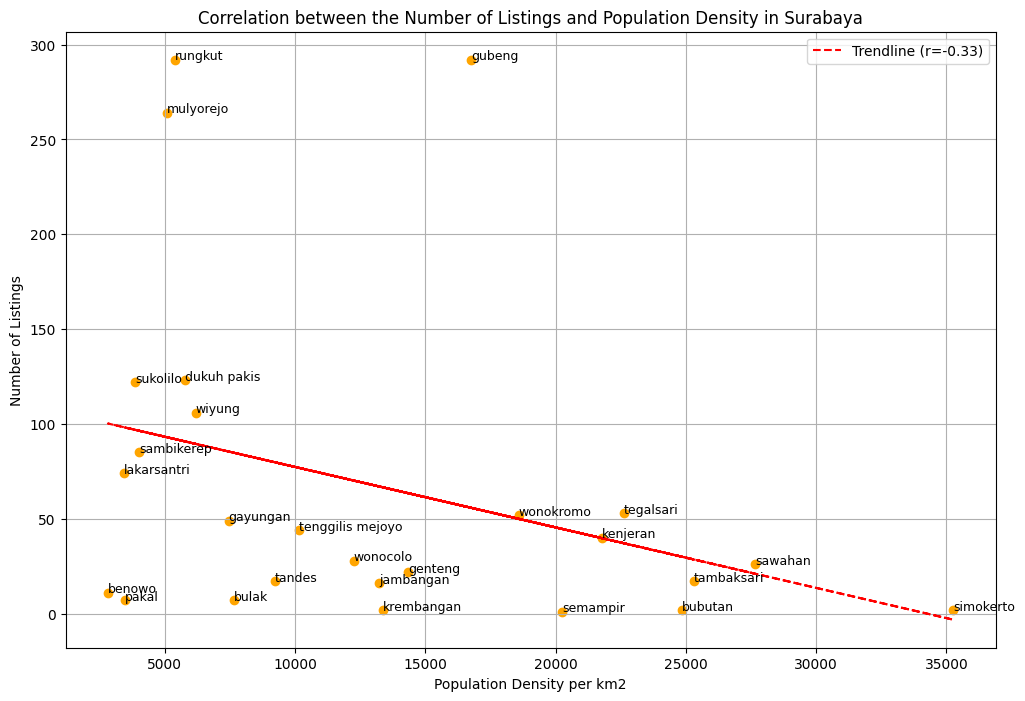

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 1. Load DATA
# =========================

# Load dataset listing OLX
df_listings = pd.read_csv('jabodetabeksur_olx_housing_dataset.csv')
df_listings['address_city'] = df_listings['address_city'].str.lower()

# Load dataset kependudukan
df_penduduk = pd.read_csv('kepadatanpenduduksby24.csv')
df_penduduk['Kecamatan'] = df_penduduk['Kecamatan'].str.lower()

# =========================
# 2. Filter hanya Surabaya & hitung jumlah listing per kecamatan
# =========================

df_surabaya = df_listings[df_listings['address_city'] == 'surabaya kota']
district_counts = df_surabaya['address_district'].str.lower().value_counts().reset_index()
district_counts.columns = ['Kecamatan', 'Listing_Count']

# =========================
# 3. Merge dengan data kepadatan penduduk
# =========================

df_merged = pd.merge(district_counts,
                     df_penduduk[['Kecamatan', 'Kepadatan Penduduk per km persegi (Km2)']],
                     on='Kecamatan', how='inner')

# =========================
# 4. Hitung korelasi dan trendline
# =========================

x = df_merged['Kepadatan Penduduk per km persegi (Km2)']
y = df_merged['Listing_Count']
corr = np.corrcoef(x, y)[0,1]
m, b = np.polyfit(x, y, 1)

# =========================
# 5. Plot scatter + label + trendline
# =========================

plt.figure(figsize=(12,8))
plt.scatter(x, y, color='orange')

for i, row in df_merged.iterrows():
    plt.text(row['Kepadatan Penduduk per km persegi (Km2)'], 
             row['Listing_Count'], 
             row['Kecamatan'], fontsize=9)

plt.plot(x, m*x + b, color='red', linestyle='--', label=f'Trendline (r={corr:.2f})')
plt.xlabel('Population Density per km2')
plt.ylabel('Number of Listings')
plt.title('Correlation between the Number of Listings and Population Density in Surabaya')
plt.legend()
plt.grid(True)
plt.show()
